# Smart Data mining
 phase 1 to phase 3 of CRISP-DM
 
## Outline
- [1 - Business Understanding](#1)
- [2 - Data Understanding](#2)
  - [2.1 - Initial Data Collection](#2.1)
  - [2.2 - Data Description](#2.2)
  - [2.3 - Data Exploration](#2.3)
- [3 - Data Preparation](#3)
  - [3.1 - Data Cleaning](#3.1)
    - [3.1.1 - Missing Values](#3.1.1)
    - [3.1.2 - Outliers](#3.1.2)
  - [3.2 - Data Transformation](#3.2)
    - [3.2.1 - Feature Selection](#3.2.1)
    - [3.2.2 - Feature engeenering](#3.2.2)
    - [3.2.3 - Data Standardization](#3.2.3)

<a name="1"></a>
## 1 - Business Understanding

<a name="1.1"></a>
## 1.1 Business Objectives
- Minimize the average waiting time and the average idle time in outpatient clinic

## 1.2 Current Situation
- See literature review in the lecture.

## 1.3 Data Mining Goals
-  Predict the proability of no-show and service time variation

<a name="2"></a>
## 2 - Data Understanding

<a name="2.1"></a>
## 2.1 - Initial Data Collection

In [1]:
#Load our local fonctions
from utils_exploration_optimised import *
# load librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Paths
path_data = "data/consult_waits_2024_03_25.csv"
pdf_path = 'type_stop_code.pdf'

In [3]:
data = pd.read_csv(path_data, on_bad_lines='skip')

<a name="2.2"></a>
### 2.2 - Data description

<div style="display: flex; justify-content: space-between;">

<div style="width: 45%;">
<strong>Objectives</strong> : Understanding the form of our data
</div>

<div style="width: 45%;">
<strong>CheckList</strong>:
<ul>
    <li>[x] Variables target : <code>no-show & service time</code></li>
    <li>[x] Lines et columns : 51861064, 15</li>
    <li>[x] Variables Description </li>
</ul>
</div>

</div>


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51861064 entries, 0 to 51861063
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   patientsid          int64  
 1   activitydatetime    object 
 2   year                int64  
 3   month               int64  
 4   sta3n               int64  
 5   stopcode            int64  
 6   dta                 float64
 7   dts                 int64  
 8   dtc                 int64  
 9   dtot                float64
 10  non_va              int64  
 11  zip                 float64
 12  state               object 
 13  disp                object 
 14  AdministrativeFlag  object 
dtypes: float64(3), int64(8), object(4)
memory usage: 16.6 GB


We are going to optimize our memomry usage by ... in the following input

In [5]:
data.drop(["dtot", "year", "month"], axis = 1, inplace = True)
data_types = {
    'patientsid': 'uint32',
    'activitydatetime' : object,
    'sta3n': 'category',
    'stopcode': 'category',
    'dta': 'float32',
    'dts': 'uint16',
    'dtc': 'uint16',
    'non_va': 'category',
    'zip': 'category',
    'state': 'category',
    'disp': 'category',
    'AdministrativeFlag': 'category'
}
data = data.astype(data_types)

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51861064 entries, 0 to 51861063
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   patientsid          uint32  
 1   activitydatetime    object  
 2   sta3n               category
 3   stopcode            category
 4   dta                 float32 
 5   dts                 uint16  
 6   dtc                 uint16  
 7   non_va              category
 8   zip                 category
 9   state               category
 10  disp                category
 11  AdministrativeFlag  category
dtypes: category(7), float32(1), object(1), uint16(2), uint32(1)
memory usage: 4.7 GB


In [7]:
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,dtc,non_va,zip,state,disp,AdministrativeFlag
0,9204541,2023-06-15 14:43:56,573,354,5.0,3,0,1,315.0,GEORGIA,COMPLETE/UPDATE,Y
1,9204541,2017-02-01 10:20:10,573,403,0.0,30,64,0,315.0,GEORGIA,COMPLETE/UPDATE,NaN
2,9204541,2021-11-03 09:32:28,573,407,2.0,54,48,1,315.0,GEORGIA,COMPLETE/UPDATE,Y
3,9204541,2015-03-26 14:30:45,573,408,1.0,134,149,0,315.0,GEORGIA,COMPLETE/UPDATE,NaN
4,9204541,2019-02-08 12:41:00,573,409,0.0,28,44,0,315.0,GEORGIA,COMPLETE/UPDATE,NaN


*Numeric Data Summary*:

In [8]:
data.describe()

,patientsid,dta,dts,dtc
count,5.186106e+07,5.186106e+07,5.186106e+07,5.186106e+07
mean,4.983169e+08,2.999511e+00,1.702302e+01,3.565651e+01
std,5.770695e+08,1.062992e+01,3.019883e+01,3.668734e+01
min,1.306000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.353048e+07,0.000000e+00,1.000000e+00,1.300000e+01
50%,2.601912e+07,1.000000e+00,6.000000e+00,2.600000e+01
75%,1.007934e+09,2.000000e+00,2.000000e+01,4.600000e+01
max,1.605574e+09,3.650000e+02,1.367000e+03,3.650000e+02


*Categorical Data Summary*:

In [9]:
categorical = data.dtypes[data.dtypes == "category"].index
print(categorical)
data[categorical].describe()

Index(['sta3n', 'stopcode', 'non_va', 'zip', 'state', 'disp',
       'AdministrativeFlag'],
      dtype='object')


,sta3n,stopcode,non_va,zip,state,disp,AdministrativeFlag
count,51861064,51861064,51861064,51860214.0,51861064,51861064,20169629
unique,130,365,2,914.0,66,3,2
top,589,205,0,782.0,FLORIDA,COMPLETE/UPDATE,Y
freq,1066226,2869776,36748066,520511.0,4708517,49443083,16487037


In [10]:
for col in data.select_dtypes("category"):
    print(f'{col :-<50} {data[col].unique()}')

sta3n--------------------------------------------- [573, 508, 568, 570, 659, ..., 515, 630, 526, 358, 620]
Length: 130
Categories (130, int64): [358, 402, 405, 436, ..., 695, 740, 756, 757]
stopcode------------------------------------------ [354, 403, 407, 408, 409, ..., 136, 715, 168, 670, 447]
Length: 365
Categories (365, int64): [102, 103, 104, 105, ..., 903, 904, 907, 999]
non_va-------------------------------------------- [1, 0]
Categories (2, int64): [0, 1]
zip----------------------------------------------- [315.0, 461.0, 322.0, 316.0, 317.0, ..., 0.0, 854.0, 91.0, 868.0, 858.0]
Length: 915
Categories (914, float64): [0.0, 6.0, 7.0, 8.0, ..., 996.0, 997.0, 998.0, 999.0]
state--------------------------------------------- ['GEORGIA', 'INDIANA', 'FLORIDA', 'SOUTH CAROLINA', 'SOUTH DAKOTA', ..., 'MARSHALL ISLANDS', 'FOREIGN COUNTRY', 'UNKNOWN', 'EUROPE', 'PHILIPPINES']
Length: 66
Categories (66, object): ['*Missing*', 'ALABAMA', 'ALASKA', 'AMERICAN SAMOA', ..., 'WASHINGTON', 'WEST VI

##### Assumptions about Dispositions (`disp`)

###### Decomposing the 'disp' Column into 'discontinued' and 'NoShow'

In this step, we decompose the `disp` column, which contains three categories: `'COMPLETE/UPDATE'`, `'DISCONTINUED'`, and `'CANCELLED'`, into two new binary columns: `discontinued` and `NoShow`.

- The `discontinued` column will be set to 1 if the original `disp` value is `'DISCONTINUED'` and 0 otherwise.
- The `NoShow` column will be set to 1 if the original `disp` value is `'CANCELLED'` and 0 otherwise.

This transformation allows us to clearly identify and separate cases where services were discontinued or cancelled from those that were completed or updated successfully (`'COMPLETE/UPDATE'`).

For instance:
- A `0` in both `discontinued` and `NoShow` indicates the event was `'COMPLETE/UPDATE'`.
- A `1` in `discontinued` indicates the event was `'DISCONTINUED'`.
- A `1` in `NoShow` indicates the event was `'CANCELLED'`.

We have expressly retained the information on service interruptions because ignoring them could bias our model. Indeed, a patient experiencing interruptions on visit \(v_t\) might not show up for the subsequent visit \(v_{t+k}\).

<a name="2.3"></a>
### 2.3 - Data Exploration

Explore the data to uncover patterns, relationships, and potential anomalies. This step includes visualizing distributions of numeric and categorical data and examining relationships between variables.

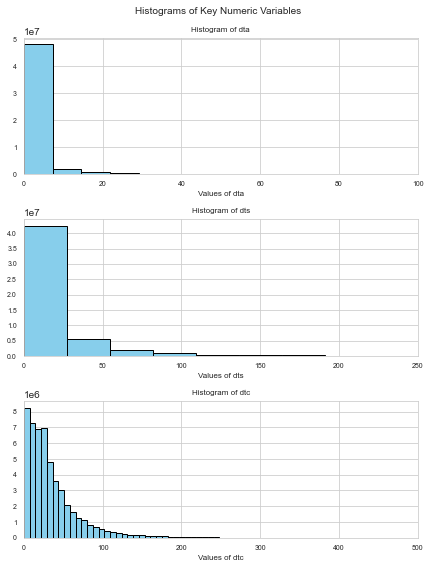

In [11]:
plot_histograms_numeric(data)

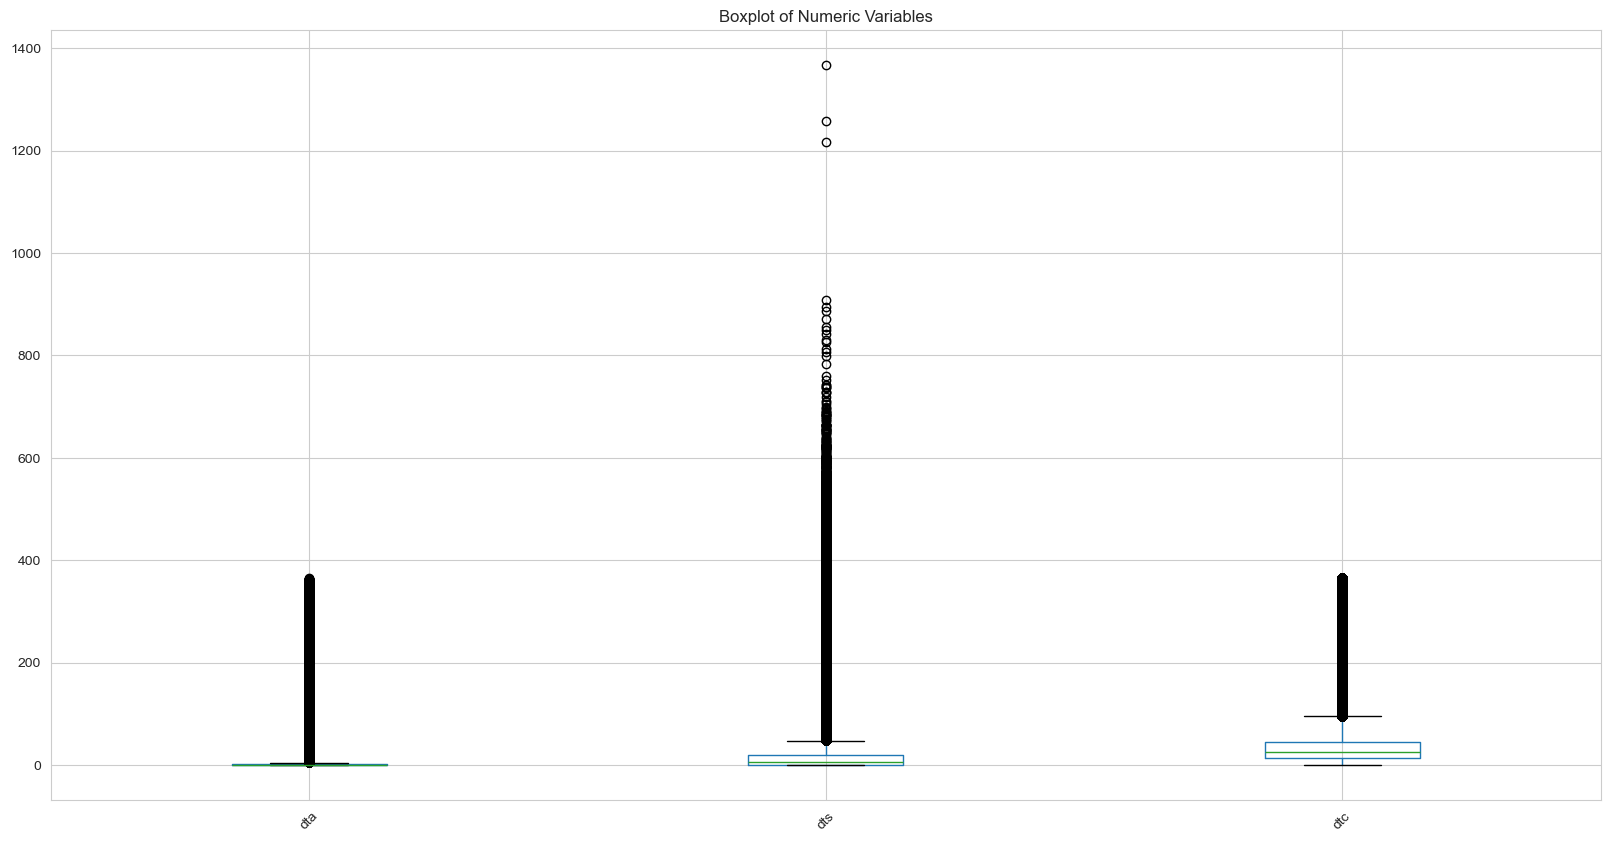

In [12]:
## Boxplots for numeric variables to spot outliers
fig, ax = plt.subplots(figsize=(20, 10))
data[["dta", "dts", "dtc", "non_va"]].boxplot(ax=ax)
plt.title('Boxplot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

In [13]:
#plot_top_category_counts(data)

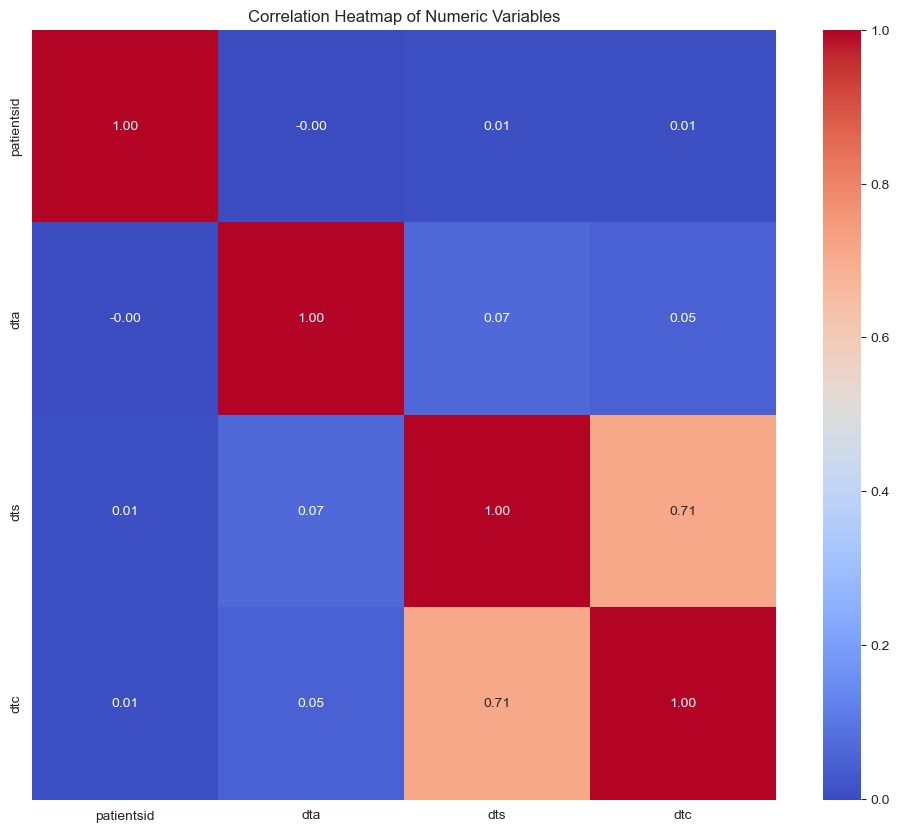

In [14]:
## Correlation Heatmap of Numeric Variables
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

Corélation entre dts et dtc qui corobore bien notre choix de résumer ces deux information en une seule, le temps de service

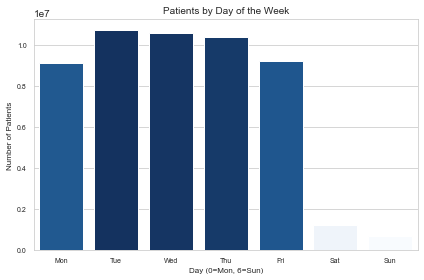

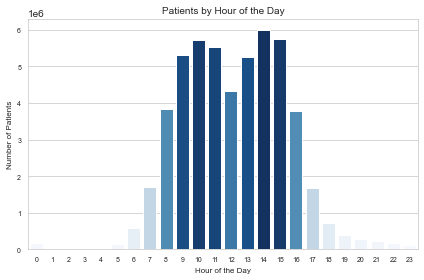

In [15]:
analyze_working_patterns(data)

<Axes: xlabel='non_va', ylabel='disp'>

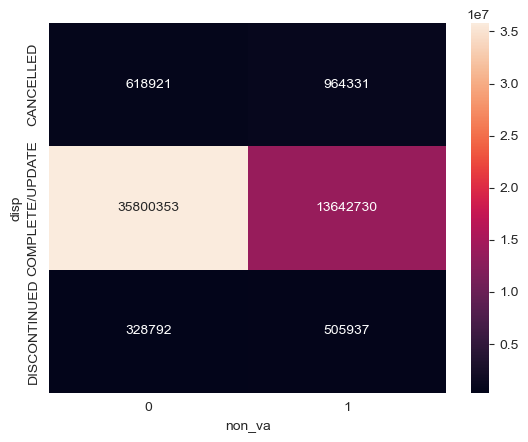

In [16]:
sns.heatmap(pd.crosstab(data['disp'], data['non_va']), annot=True, fmt='d')

In [17]:
data = decompose_disp_column(data)

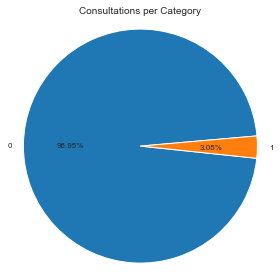

In [18]:
plot_consultation_counts(data)

In [19]:
primary_care_codes, mental_health_codes, all_other_specialties_codes = extract_stop_codes(pdf_path)

print("Primary Care Stop Codes:", primary_care_codes)
print("Mental Health Stop Codes:", mental_health_codes)
print("All Other Specialties Stop Codes:", all_other_specialties_codes)


Primary Care Stop Codes: ['322', '301', '318', '177', '348', '323']
Mental Health Stop Codes: ['502', '533', '509', '538', '510']
All Other Specialties Stop Codes: ['190', '302', '392', '317', '203', '487', '333', '391', '334', '402', '231', '303', '436', '311', '159', '160', '150', '180', '304', '106', '130', '212', '305', '369', '307']


In [20]:
# Filter the DataFrame
data = filter_stop_codes(data, primary_care_codes, mental_health_codes, all_other_specialties_codes)
print("Filtered DataFrame:")
data.shape

Filtered DataFrame:


(14691060, 13)

In [21]:
# Add the binary variable "type_soins"
data = add_type_soins(data, primary_care_codes)
print("\nUpdated DataFrame with 'type_soins':")
data[data['typecare']==1]


Updated DataFrame with 'type_soins':


,patientsid,activitydatetime,sta3n,stopcode,dta,dts,dtc,non_va,zip,state,AdministrativeFlag,NoShow,discontinued,typecare
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,9,1,315.0,GEORGIA,Y,0,0,1
9,9204549,2023-07-03 15:04:38,573,180,2.0,53,70,1,322.0,FLORIDA,Y,0,0,1
14,9204549,2023-01-31 08:10:47,573,436,0.0,0,130,0,322.0,FLORIDA,NaN,0,0,1
15,9204549,2021-03-18 16:43:02,573,502,3.0,81,116,0,322.0,FLORIDA,NaN,0,0,1
20,9204559,2017-06-26 14:06:11,573,307,1.0,1,34,0,316.0,GEORGIA,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51861040,7941828,2023-04-20 09:47:27,557,391,0.0,4,14,0,312.0,GEORGIA,NaN,0,0,1
51861050,7949492,2020-07-10 09:49:45,557,180,0.0,7,12,1,310.0,GEORGIA,Y,0,0,1
51861052,7949492,2022-05-16 10:58:36,557,303,0.0,10,15,0,310.0,GEORGIA,NaN,0,0,1
51861053,7949492,2014-10-01 13:14:59,557,307,3.0,35,44,0,310.0,GEORGIA,NaN,0,0,1


In [22]:
data.shape

(14691060, 14)

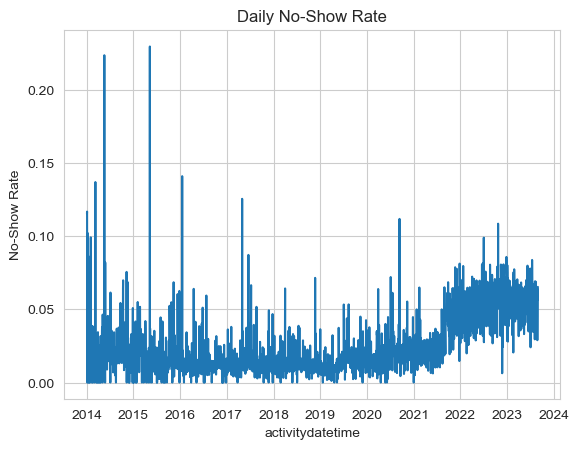

In [23]:
# Convert 'activitydatetime' to datetime type if not already done
data['activitydatetime'] = pd.to_datetime(data['activitydatetime'])

# Create a daily time series of the no-show rate
daily_no_show = data.groupby(data['activitydatetime'].dt.date)['NoShow'].mean()

# Display time series
daily_no_show.plot(title='Daily No-Show Rate')
plt.ylabel('No-Show Rate')
plt.show()

There was a high peak in 2014, with almost 50% of NoShows. This can be explained by the fact that the VCP (Veteran Choice Program) was launched in the same year in response to the waiting times experienced by veterans. It is clear that waiting times lead to NoShows (at the time of the visit or at future visits). The significant and rapid reduction after 2014 demonstrates the relevance of this programme. Other sporadic peaks in subsequent years suggest one-off events such as weather problems.

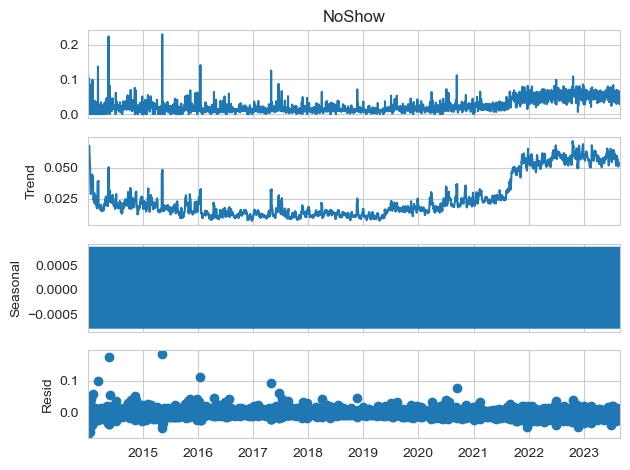

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
daily_no_show.index = pd.to_datetime(daily_no_show.index)

# Seasonal decomposition with specified period
result = seasonal_decompose(daily_no_show, model='additive', period=7)
result.plot()
plt.show()

In [25]:
#data[(data['dtc'] <= data['dts'])]

In [26]:
# Find the last date in the 'activitydatetime' column
last_date = data['activitydatetime'].max()
first_date = data['activitydatetime'].min()
print("The most recent date is:", last_date)
print("The oldest is:", first_date)

The most recent date is: 2023-08-30 23:57:09
The oldest is: 2014-01-02 11:48:13


### Filtrage données

(12158668, 14)


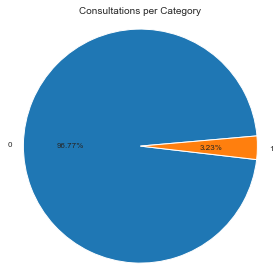

In [27]:
data = filter_dates_after(data, 'activitydatetime', '2016-08-30 00:00:00')
print(data.shape)
# Plotting the number of consultations per category
plot_consultation_counts(data)

In [28]:
data = add_temporal_features(data, 'activitydatetime')
data.shape

(12158668, 18)

In [29]:
#plot_no_show_comparaison(data)

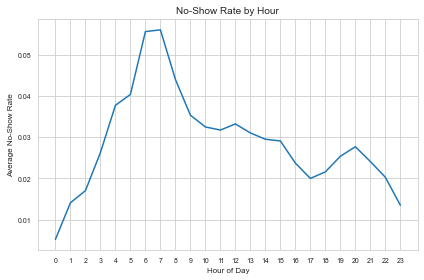

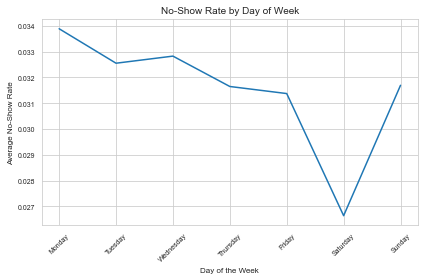

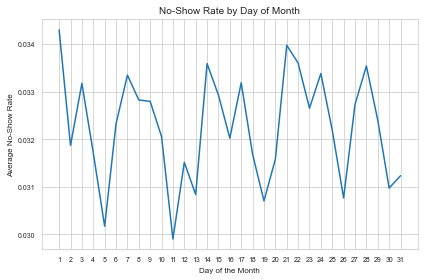

In [30]:
plot_patient_flow(data, 'NoShow')

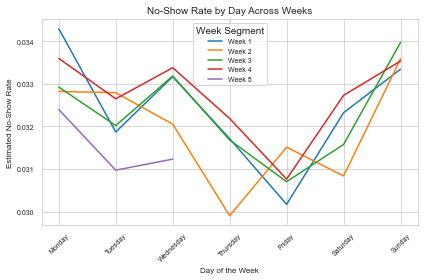

In [31]:
plot_patient_flow_segmented(data, 'NoShow')

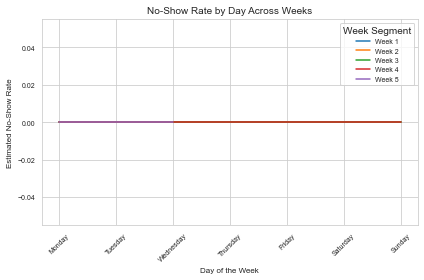

In [32]:
plot_patient_flow_segmented(data, 'NoShow', estimator=np.median)

<a name="3"></a>
## 3 - Data Preparation
<a name="3.1"></a>
### 3.1 - Data Cleaning

<a name="3.1.1"></a>
3.1.1 - Missing Values

In [33]:
#plt.figure(figsize = (20, 10))
#sns.heatmap(data.isna())

In [34]:
display_missing_values(data)

Percentage of missing values per column:


patientsid              0.000000
activitydatetime        0.000000
sta3n                   0.000000
stopcode                0.000000
dta                     0.000000
dts                     0.000000
dtc                     0.000000
non_va                  0.000000
zip                     0.001719
state                   0.001324
AdministrativeFlag     56.864568
NoShow                  0.000000
discontinued            0.000000
typecare                0.000000
day_of_week             0.000000
day_of_month            0.000000
month                   0.000000
hour                    0.000000
week_segment            0.000000
day_in_week_segment     0.000000
dtype: float64

In [35]:
data['AdministrativeFlag']

6             Y
23166054      Y
23166183    NaN
23166184    NaN
23166187    NaN
           ... 
2849089       Y
16381857      Y
44860591      Y
16381557    NaN
35848576    NaN
Name: AdministrativeFlag, Length: 12158668, dtype: category
Categories (2, object): ['N', 'Y']

In [36]:
data[data['AdministrativeFlag'].isna()].head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,dtc,non_va,zip,state,AdministrativeFlag,NoShow,discontinued,typecare,day_of_week,day_of_month,month,hour,week_segment,day_in_week_segment
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,24,0,700.0,LOUISIANA,NaN,0,0,1,0,6,6,9,1,6
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,45,0,700.0,LOUISIANA,NaN,0,0,1,0,22,4,16,4,1
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,42,0,655.0,MISSOURI,NaN,1,0,1,0,31,7,11,5,3
23166223,1001913008,2023-07-17 11:07:57,740,502,0.0,21,42,0,784.0,TEXAS,NaN,0,0,1,0,17,7,11,3,3
23166243,1001913014,2016-10-24 15:16:36,740,502,2.0,1,18,0,785.0,TEXAS,NaN,0,0,1,0,24,10,15,4,3


Given the high volume of missing data and its MCAR (Missing Completely At Random) nature, and we assume AdministrativeFlag is not critical to analysis, considering its removal could streamline the dataset and focus efforts on more reliable variables.

*Missing value prepocessing*

In [37]:
data.drop('AdministrativeFlag', axis=1, inplace=True)

Given our large dataset and the small proportion represented by the maquante values of `zip` and `state`, we used the listwiseDeletion method for the methods. This simple method consists of deleting the rows where there are maquante values linked to these two columns.

In [38]:
# Identify line indices where 'zip' is NaN or 'state' is '*Missing*'.
missing_zip_index = data[data['zip'].isnull()].index
missing_state_index = data[data['state'] == '*Missing*'].index

# Combine indices in a single set to ensure uniqueness
all_missing_indices = missing_zip_index.union(missing_state_index)

# Delete lines with combined indices in a single operation
data.drop(index=all_missing_indices, inplace=True)
print(data.shape)

(12158459, 19)


<a name="3.1.2"></a>
3.1.2 - Outliers

Traitement des outliers

In the outliers section, we began by looking for schelduling dates that are more recent than their completion date.  
Note that the order of outlier processing (as with most other processing) is guided by the resource complexity of the operation. Given the robust size of our data, performing certain operations first would be very costly, if not impossible (crashing).

In [39]:
# Find and display rows where 'dts' is greater than 'dtc'
len_out_dtc = len(data[data['dts'] > data['dtc']])
print("Number of Rows where 'dts' is greater than 'dtc':", len_out_dtc)

Number of Rows where 'dts' is greater than 'dtc': 815809


New data shape after outlier removal: (11342650, 19)


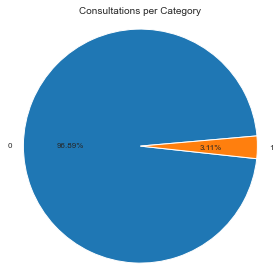

In [40]:
# Filter the data to remove rows where 'dts' is greater than 'dtc'
data = data[data['dts'] <= data['dtc']]

# Display new data shape after removing erroneous entries
print("New data shape after outlier removal:", data.shape)
plot_consultation_counts(data)

In [41]:
pd.crosstab(data[(data['dtc'] == data['dts'])]['NoShow'], data[(data['dtc'] == data['dts'])]['typecare'])

typecare,0,1
NoShow,,
0,63292,726890
1,3443,21151


In [42]:
# Define the condition for invalid rows
logic_st_ns = (data['NoShow'] == 1) & (data['dts'] != data['dtc'])
    
# Count the number of invalid rows
invalid_rows_count = data[logic_st_ns].shape[0]
    
# Remove invalid rows
#data = data[~logic_st_ns]

print(invalid_rows_count)

327776


In [43]:
pd.crosstab(data[(data['dtc'] == data['dts'])]['dts'], data[(data['dtc'] == data['dts'])]['NoShow'])

NoShow,0,1
dts,,
0,338236,8516
1,64411,1543
2,21705,644
3,20518,642
4,17238,584
...,...,...
361,3,0
362,4,0
363,9,0


In [44]:
#remove_outliers_from_dataframe(data)

#### Outlier Detection in Categorical Variables
For categorical variables, We assume that any anomalies or irregular entries were controlled during data entry, often through enforced choices like dropdown menus or checklists.


<a name="3.1.3"></a>
3.1.3 - Duplicated Values

In [45]:
initial_count = len(data)
data.drop_duplicates(inplace=True)
duplicates_removed = initial_count - len(data)
print(f'Number of deleted duplicates: {duplicates_removed}')

Number of deleted duplicates: 37


In [46]:
print(data.shape)

(11342613, 19)


<a name="3.2"></a>
3.2 - Data Transformation

In [47]:
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,dtc,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,hour,week_segment,day_in_week_segment
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,9,1,315.0,GEORGIA,0,0,1,0,29,6,12,5,1
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,24,0,700.0,LOUISIANA,0,0,1,0,6,6,9,1,6
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,45,0,700.0,LOUISIANA,0,0,1,0,22,4,16,4,1
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,42,0,655.0,MISSOURI,1,0,1,0,31,7,11,5,3
23166207,1001912997,2020-09-28 12:11:59,740,303,1.0,26,39,1,784.0,TEXAS,0,0,1,0,28,9,12,4,7


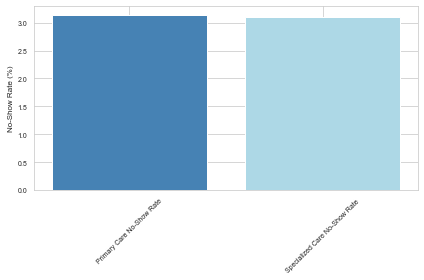

In [48]:
plot_no_show_rate_by_typecare(data)

<a name="3.2.2"></a>
3.2.1 - Feature engeneering

##### Summarizing Scheduling and Completion Durations

In this step, we summarize the information on scheduling duration (`dts`) and completion duration (`dtc`) into a single column `ts`, where `ts` = `dtc` - `dts`.

We have demonstrated the potential relationship between these two variables, confirmed by a collinearity test showing they are positively correlated. Moreover, `ts` contains positive values, as we have observed outliers where `dts` is greater than `dtc`.

In [49]:
# Add the new column 'service_time' by subtracting 'dts' from 'dtc'
data['service_time'] = data['dtc'] - data['dts']
# drop the dtc column 
data.drop(['dtc'], axis=1, inplace=True)

print("Data after adding 'service_time' dropping and 'dtc':")

data.head()

Data after adding 'service_time' dropping and 'dtc':


,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,hour,week_segment,day_in_week_segment,service_time
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,1,315.0,GEORGIA,0,0,1,0,29,6,12,5,1,8
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,0,700.0,LOUISIANA,0,0,1,0,6,6,9,1,6,18
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,0,700.0,LOUISIANA,0,0,1,0,22,4,16,4,1,42
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,0,655.0,MISSOURI,1,0,1,0,31,7,11,5,3,42
23166207,1001912997,2020-09-28 12:11:59,740,303,1.0,26,1,784.0,TEXAS,0,0,1,0,28,9,12,4,7,13


servvice time by hour and weekday in VHA & CC

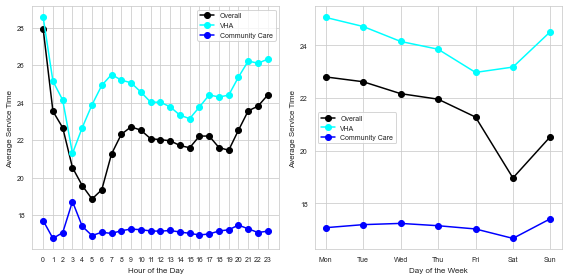

In [50]:
plot_service_time_by_hour_and_weekday_vha(data)

servvice time by hour and weekday in primary & speciality care

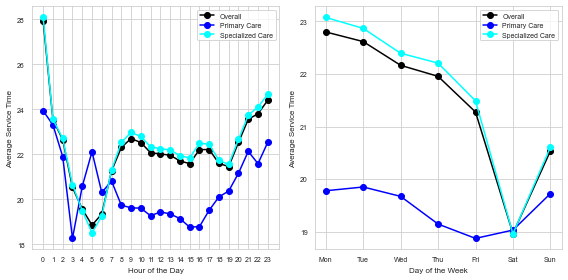

In [51]:
plot_service_time_by_hour_and_weekday_type_care(data)

In [52]:
#remove_outliers_from_column(data, ["service_time", "dta", "dtc"])

In [53]:
len(data[(data['NoShow'] == 1) & (data['service_time'] == 1)])

18483

In [54]:
data.shape

(11342613, 18)

In [55]:
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,1,315.0,GEORGIA,0,0,1,0,29,6,5,1,8
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,0,700.0,LOUISIANA,0,0,1,0,6,6,1,6,18
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,0,700.0,LOUISIANA,0,0,1,0,22,4,4,1,42
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,0,655.0,MISSOURI,1,0,1,0,31,7,5,3,42
23166207,1001912997,2020-09-28 12:11:59,740,303,1.0,26,1,784.0,TEXAS,0,0,1,0,28,9,4,7,13


In [56]:
count_consultations(data)

{'Community Care (CC) Consultations': 3349206, 'VHA Consultations': 7993407}

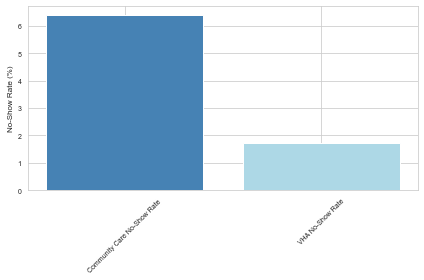

In [57]:
plot_no_show_rate_comparaison(data)

In [58]:
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,1,315.0,GEORGIA,0,0,1,0,29,6,5,1,8
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,0,700.0,LOUISIANA,0,0,1,0,6,6,1,6,18
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,0,700.0,LOUISIANA,0,0,1,0,22,4,4,1,42
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,0,655.0,MISSOURI,1,0,1,0,31,7,5,3,42
23166207,1001912997,2020-09-28 12:11:59,740,303,1.0,26,1,784.0,TEXAS,0,0,1,0,28,9,4,7,13


In [59]:
no_shows_count = count_no_shows_by_establishment(data)
print(no_shows_count)

sta3n
756    11169
626     9699
663     9125
520     8217
528     7626
       ...  
526      384
692      357
666      347
620      271
358        0
Name: count, Length: 130, dtype: int64


In [60]:
data, data_without_no_shows, stopcodes_without_no_shows = separate_stopcodes_by_no_show(data)
print("\nNombre de lignes avec des stopcodes ayant des no-shows :", len(data))
print("Liste des stopcodes without no-shows :", stopcodes_without_no_shows)
print("Lignes avec des stopcodes n'ayant pas de no-shows :", len(data_without_no_shows))

data.head()


Nombre de lignes avec des stopcodes ayant des no-shows : 11342613
Liste des stopcodes without no-shows : [], Categories (365, int64): [102, 103, 104, 105, ..., 903, 904, 907, 999]
Lignes avec des stopcodes n'ayant pas de no-shows : 0


,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time
6,9204541,2020-06-29 12:56:56,573,502,4.0,1,1,315.0,GEORGIA,0,0,1,0,29,6,5,1,8
23166183,1001289482,2022-06-06 09:20:20,629,303,0.0,6,0,700.0,LOUISIANA,0,0,1,0,6,6,1,6,18
23166184,1001289482,2019-04-22 16:12:55,629,305,1.0,3,0,700.0,LOUISIANA,0,0,1,0,22,4,4,1,42
23166187,1000663151,2023-07-31 11:05:01,564,303,30.0,0,0,655.0,MISSOURI,1,0,1,0,31,7,5,3,42
23166207,1001912997,2020-09-28 12:11:59,740,303,1.0,26,1,784.0,TEXAS,0,0,1,0,28,9,4,7,13


In [61]:
print("\n Number of lines with stopcodes that have no no-shows :", len(data_without_no_shows))
data_without_no_shows.head(20)


 Number of lines with stopcodes that have no no-shows : 0


,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time


In [62]:
print("The stopCode without No-show")
data_without_no_shows['stopcode'].unique()

The stopCode without No-show


[], Categories (365, int64): [102, 103, 104, 105, ..., 903, 904, 907, 999]

In [63]:
data.shape

(11342613, 18)

In [64]:
# Convert activitydatetime to datetime type if not already done
data['activitydatetime'] = pd.to_datetime(data['activitydatetime'])
# Sort data by patientsid, stopcode and activitydatetime to facilitate calculations
data = data.sort_values(by=['patientsid', 'activitydatetime'])

In [65]:
# Calculate cumulative absences and consultations for each patient
data['cumulative_NoShow'] = data.groupby('patientsid')['NoShow'].expanding().sum().reset_index(level=0, drop=True)
data['cumulative_visits'] = data.groupby('patientsid')['NoShow'].expanding().count().reset_index(level=0, drop=True)

# Calculate the previous absence rate
data['prior_noShow_rate'] = data['cumulative_NoShow'] / data['cumulative_visits']

# Move the rate so that it represents the rate before the current consultation
data['prior_noShow_rate'] = data.groupby('patientsid')['prior_noShow_rate'].shift(1).fillna(0)

# Delete temporary columns
data = data.drop(columns=['cumulative_NoShow', 'cumulative_visits'])
# Display the first lines for verification
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time,prior_noShow_rate
24781417,1957,2017-06-20 09:30:04,358,203,1.0,75,0,234.0,VIRGINIA,0,0,1,1,20,6,3,6,19,0.0
24781424,2577,2021-11-03 08:39:33,358,303,0.0,0,0,969.0,GUAM,0,0,1,2,3,11,1,3,132,0.0
24781427,3280,2019-12-06 09:41:52,358,303,0.0,4,0,921.0,CALIFORNIA,0,0,1,4,6,12,1,6,273,0.0
24781430,3590,2021-05-17 10:01:06,358,303,1.0,0,0,965.0,ARMED FORCES PACIFIC,0,0,1,0,17,5,3,3,6,0.0
24781434,3786,2019-07-12 10:28:53,358,203,0.0,0,0,891.0,NEVADA,0,0,1,4,12,7,2,5,0,0.0


In [66]:
# Calculer la somme cumulée et le nombre cumulatif des service_time pour chaque patient
data['cumulative_service_time_sum'] = data.groupby('patientsid')['service_time'].expanding().sum().reset_index(level=0, drop=True)
data['cumulative_service_time_count'] = data.groupby('patientsid')['service_time'].expanding().count().reset_index(level=0, drop=True)

# Calculer la moyenne du service_time précédent
data['prior_service_time_avg'] = data['cumulative_service_time_sum'] / data['cumulative_service_time_count']

# Déplacer la moyenne pour qu'elle représente la moyenne avant la consultation actuelle
data['prior_service_time_avg'] = data.groupby('patientsid')['prior_service_time_avg'].shift(1).fillna(0)

# Supprimer les colonnes temporaires
data = data.drop(columns=['cumulative_service_time_sum', 'cumulative_service_time_count'])
data.head()

,patientsid,activitydatetime,sta3n,stopcode,dta,dts,non_va,zip,state,NoShow,discontinued,typecare,day_of_week,day_of_month,month,week_segment,day_in_week_segment,service_time,prior_noShow_rate,prior_service_time_avg
24781417,1957,2017-06-20 09:30:04,358,203,1.0,75,0,234.0,VIRGINIA,0,0,1,1,20,6,3,6,19,0.0,0.0
24781424,2577,2021-11-03 08:39:33,358,303,0.0,0,0,969.0,GUAM,0,0,1,2,3,11,1,3,132,0.0,0.0
24781427,3280,2019-12-06 09:41:52,358,303,0.0,4,0,921.0,CALIFORNIA,0,0,1,4,6,12,1,6,273,0.0,0.0
24781430,3590,2021-05-17 10:01:06,358,303,1.0,0,0,965.0,ARMED FORCES PACIFIC,0,0,1,0,17,5,3,3,6,0.0,0.0
24781434,3786,2019-07-12 10:28:53,358,203,0.0,0,0,891.0,NEVADA,0,0,1,4,12,7,2,5,0,0.0,0.0


<a name="3.2.2"></a>
3.2.2 - Feature Selection

In [67]:
data.drop('activitydatetime', axis=1, inplace=True)
#del daily_no_show

In [68]:
data.drop(['patientsid'], axis = True, inplace=True)

<a name="3.2.3"></a>
3.2.3 - Data Standardization/normalisation

In [11]:
save_dataframe(data, 'data_st')